# Введение в методы возмущений для гамильтоновых систем

*Лекция* **Методы осреднения**


## Теория метода

Метод осреднения является одним из широко применяемых асимптотических методов,
позволяющих исследовать решения сложных дифференциальных уравнений, возникающих при изучении задач физики, механики, теории колебаний. 

Сущность этого метода состоит в том, что изучаемая система дифференциальных уравнений вида $\dot{\mathbf x}=\mathbf f$, где правые части $\mathbf f$ могут зависеть от функций $\mathbf х$, аргумента $t$ и различных физических параметров, заменяется системой уравнений $\dot{\mathbf x}=\bar{\mathbf f}$, где $\bar{\mathbf f}$ подбираются таким образом, чтобы, с одной стороны, новая система уравнении была в каком-то смысле проще исходной, а с другой стороны, чтобы решения новой системы достаточно точно описывали решения исходной системы. 

Оказывается, что в общем случае для построения функций $\bar{\mathbf f}$ может быть применен процесс осреднения функций ${\mathbf f}$  по явно входящему аргументу $t$ или некоторые более общие способы осреднения.

## Системы в стандартной форме

Рассмотрим систему вида
$$
\dot{\mathbf x}=\varepsilon\mathbf f(\mathbf x,t,\varepsilon),\quad \mathbf x\in U\subset \mathbb R^n,\quad 0\leqslant\varepsilon\ll 1,\tag{1}
$$
где $\mathbf f$ - вектор-функция класса $C^r$, $r\geqslant2$, периодическая по $t$ с периодом $T>0$.

Такая система называется системой в ***стандартной форме***.

Соответствующая автономная усреднённая система определяется как
$$
\dot{\mathbf y}=\varepsilon\frac1T\int\limits_0^T\mathbf f(\mathbf y,t,0)dt\equiv\varepsilon\left<{\mathbf f}\right>(\mathbf y).\tag{2}
$$

Тогда справедлива 


**Теорема об усреднении** (Боголюбов)

Существует замена переменных $\mathbf x=\mathbf y+\varepsilon\mathbf w(\mathbf y,t,\varepsilon)$ класса $C^r$, приводящая  систему (1) к виду
$$
	\dot{\mathbf y}=\varepsilon\left<\mathbf f(\mathbf y)\right>+\varepsilon^2\mathbf f_1(\mathbf y,t,\varepsilon).\tag{3}
$$

Если $\mathbf x(t)$ и $\mathbf y(t)$ суть решения систем (1) и (3) с начальными условиями $\mathbf x_0$, $\mathbf y_0$ соответственно и $|\mathbf x_0-\mathbf y_0|=O(\varepsilon)$, то $|\mathbf x(t)-\mathbf y(t)|=O(\varepsilon)$ на интервале $t\sim 1/\varepsilon$.


### Приведение систем к стандартной форме

Некоторые динамические системы, содержащие малый параметр, стандартной формы не имеют.

Однако, для определенных классов таких систем существуют замены переменных, приводящие их
к стандартной форме.

Системы вида
$$\dot x_1 = \varepsilon x_2,\quad \dot x_2 = h(t, x_1) + \varepsilon f(t, x_1, x_2) $$
с помощью подстановки
$$x_1 = y_1,\quad  x_2 = y_2 + \varphi(t, y_1),\quad \varphi(t, y_1) =\int h(t, y_1)d\,t$$
приводится к стандартной форме
$$ 
\begin{aligned}
\dot y_1 =& \varepsilon(y_2 + \varphi(t, y_1)),\\ 
\dot y_2 =& \varepsilon \left[f(t, y_1, y_2 + \varphi(t, y_1)) − (y_2 + \varphi(t, y_1))\frac{\partial\varphi(t, y_1)}{\partial y_1}\right].
\end{aligned}
$$

Для колебательных систем вида 
$$
\ddot x+\omega_0^2x=\varepsilon f\left(x,\dot x\right)\tag{*}
$$
удобно рассматривать движение на фазовой плоскости $(x,\dot x)$ в полярных координатах $r,\varphi$. При этом считаем переменную $r$ **медленной**, а переменную $\varphi$ - **быстрой**. Замена 
$$
x=r\cos\varphi,\quad \dot x=-\omega_0r\sin\varphi\tag{**}
$$

приводит исходное уравнение (*) к системе 
$$
\begin{aligned}
\dot r&=-\frac\varepsilon{\omega_0} f \sin\varphi,\\
\dot\varphi&= \omega_0-\frac\varepsilon{\omega_0} \frac fr\cos\varphi.
\end{aligned}\tag{***}
$$

Тогда уравнение траектории имеет стандартный вид: 
$$\dfrac{d r}{d\varphi}=-\varepsilon\frac{f \sin\varphi}{\omega_0^2-\varepsilon f \cos\varphi /r}.$$ 

Применение теоремы Боголюбова даёт осреднённое уравнение 
$$\frac{d\langle r\rangle}{d\varphi}=-\frac\varepsilon{\omega_0^2}\left\langle f \sin\varphi\right\rangle.$$

По т. Боголюбова поправку к частоте можно найти из усреднения второго уравнения системы (***): 
$$\varphi-\omega_0\equiv\omega_1=-\dfrac\varepsilon{\omega_0} \left\langle\frac fr\cos\varphi \right\rangle.$$



# Вычисление поправки первого порядка

In [168]:
import sympy as sym
from sympy import Symbol, symbols, exp, sin, cos, series,\
Function, init_printing, Derivative, diff, Eq, simplify, collect, expand, pi,\
integrate, dsolve, lambdify
init_printing()

**Пример 1.** 

Найти первую поправку к частоте для уравнения Дюффинга 
$\ddot x+\omega_0^2x+\varepsilon x^3=0$.

In [170]:
# Определим вспомогательную процедуру усреднения
def Average(f,v,T=2*pi):
    """
    Compute average of periodic function f on period T
    """
    return (integrate(f,(v,0,T))/T).simplify()

In [171]:
# Определяем переменные и функции
t,eps=symbols('t varepsilon',real = True)
x=Function('x')
r,phi,omega0=symbols("r varphi omega0",real=True)

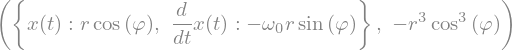

In [172]:
# Подстановка по формуле (*)
Subsphase={x(t):r*cos(phi),Derivative(x(t),t):-r*omega0*sin(phi)}
# Возмущение в уравнении Дюффинга
f=-x(t)**3
f_rphi=f.subs(Subsphase)
Subsphase,f_rphi

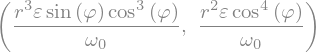

In [173]:
# Уравнение Дюффинга в переменных r,phi
Eq_r=-eps/omega0*f_rphi*sin(phi)
Eq_phi=-eps/omega0*cos(phi)*f_rphi/r
Eq_r,Eq_phi

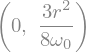

In [174]:
# Вычисляем усреднение для r и phi
r_avg = Average(Eq_r.coeff(eps,1),phi)
omega_avg = Average(Eq_phi.coeff(eps,1),phi)
r_avg,omega_avg

**Пример 2**

Осциллятор Ван-дер-Поля $\ddot x+ x = \varepsilon(1 − x^2)\dot x$.

In [175]:
# Возмущение в уравнении Ван-дер-Поля
fVdP=(1-x(t)**2)*Derivative(x(t),t)
fVdP_rphi=fVdP.subs(Subsphase)
fVdP_rphi

In [176]:
# Уравнение Ван-дер-Поля в переменных r,phi
EqVdP_r=-eps/omega0*fVdP_rphi*sin(phi)
EqVdP_phi=-eps/omega0*cos(phi)*fVdP_rphi/r
EqVdP_r,EqVdP_phi

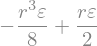

In [179]:
# Вычисляем усреднение для уравнения траектории
rhs_avg=Average(EqVdP_r,phi).expand()
rhs_avg

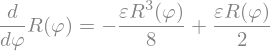

In [178]:
# Составляем уравнение для траектории
R=Function("R")
Eq_avgR = Eq(Derivative(R(phi),phi),rhs_avg.subs(r,R(phi)))
Eq_avgR

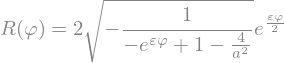

In [72]:
# Решаем уравнение с начальным условием R(0)=a
a = Symbol("a",real=True)
sol_VdPavg = dsolve(Eq_avgR,R(phi),ics={R(0):a})
sol_VdPavg

In [80]:
# Проверка решения
Eq_avgR.subs(sol_VdPavg.lhs,sol_VdPavg.rhs).doit().simplify()

In [98]:
# Нарисуем траекторию для разных значений a и eps=0.1
import numpy as np
import matplotlib.pyplot as plt
epsval,a2,al2,ag2 = 0.2,2.0,1.5,2.5
R_a2  = lambdify([phi],sol_VdPavg.rhs.subs({a:a2,eps:epsval}),'numpy')
R_al2 = lambdify([phi],sol_VdPavg.rhs.subs({a:al2,eps:epsval}),'numpy')
R_ag2 = lambdify([phi],sol_VdPavg.rhs.subs({a:ag2,eps:epsval}),'numpy')

In [101]:
Phi = np.arange(0, 4*np.pi, 0.01)
r_a2 = a2*np.ones(Phi.size)#R_a2(Phi)
r_al2 = R_al2(Phi)
r_ag2 = R_ag2(Phi)

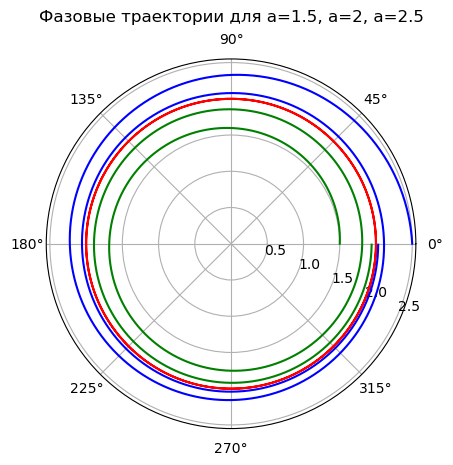

In [102]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(Phi, r_a2,"r")
ax.plot(Phi, r_al2,"g")
ax.plot(Phi, r_ag2,"b")
ax.set_rmax(2.55)
ax.set_rticks([0.5, 1, 1.5, 2, 2.5])  
ax.set_rlabel_position(-22.5) 
ax.grid(True)
ax.set_title("Фазовые траектории для a=1.5, a=2, a=2.5", va='bottom')
plt.show()

**Вопрос:** Можно ли получить поправки для уравнения Ван-дер-Поля методом Линдштета-Пуанкаре?

# Вычисление поправок высоких порядков

Если первое усреднение даёт нулевые поправки, то следует искать поправки следующих порядков.

Это можно сделать используя обобщённый метод усреднения, цель которого построить преобразование,
близкое к тождественному, которое переводит систему в стандартной форме
$$
\dot r=-\frac\varepsilon{\omega_0} f \sin\varphi,\quad 
\dot\varphi= \omega_0-\frac\varepsilon{\omega_0} \frac fr\cos\varphi\tag{1}
$$
в систему
$$
\dot a=\varepsilon A_1(a)+\varepsilon^2 A_2(a)+\dotsb,\quad
\dot\psi=\omega_0+\varepsilon B_1(a)+\varepsilon^2 B_2(a)+\dotsb\tag{2}
$$
с помощью преобразования
$$
r=a+\varepsilon a_1(a,\psi)+\varepsilon^2a_2(a,\psi)+\dotsc,\quad
\varphi=\psi+\varepsilon\psi_1(a,\psi)+\varepsilon^2\psi_2(a,\psi)+\dotsc\tag{3}
$$

Подставляя (3) и (2)  в (1) и собирая члены при равных
степенях $\varepsilon$, получим для каждой степени $n$ систему вида
\begin{equation}%\label{eq:ustersys}
\omega_0\frac{\partial a_n}{\partial\psi}+A_n=F_n(a,\psi),\quad
\omega_0\frac{\partial\psi_n}{\partial\psi}+B_n=G_n(a,\psi).
\tag{4}
\end{equation}

Члены $A_n,B_n$ выбираются равными медленно меняющимся членам $F_n(a,\psi),G_n(a,\psi)$, т.е.
равны усреднению последних по переменной $\psi$ на периоде $2\pi$.

Тогда величины $A_n$ и $B_n$ полагаются равными медленно меняющимся членам:
$$ A_n=\left\langle F_n(a,\psi)\right\rangle,\quad B_n=\left\langle G_n(a,\psi)\right\rangle$$

Для величин $a_n,\psi_n$ получаем уравнения
$$ \omega_0\frac{\partial a_n}{\partial\psi}=F_n(a,\psi)-A_n,\quad
\omega_0\frac{\partial\psi_n}{\partial\psi}=G_n(a,\psi)-B_n.
$$

**Пример 3**

Найти поправки второго порядка для колебательной системы с квадратичным демпфированием $f=-\alpha x^2-\beta\dot x^2$.

**Пример 3**

Найти поправки второго порядка для осциллятор Ван-дер-Поля $\ddot x+ x = \varepsilon(1 − x^2)\dot x$.

In [104]:
# Квадратичное возмущение 
alpha,beta=symbols("alpha,beta",real=True)
f=-alpha*x(t)**2-beta*Derivative(x(t),t)**2
f_rphi=f.subs(Subsphase)
f_rphi

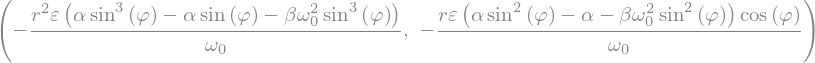

In [105]:
# Уравнения для r и phi
Eq_r=(-eps/omega0*f_rphi*sin(phi)).trigsimp()
Eq_phi=(-eps/omega0*cos(phi)*f_rphi/r).trigsimp()
Eq_r,Eq_phi

In [140]:
# Уравнения в переменных r, phi посчитаны в Примере 2
EqVdP_r,EqVdP_phi

In [141]:
# Вспомогательные переменные
Nexpand=3 # Порядок разложения
a=Function("a")
psi=Function("psi")
A,Psi=symbols("a psi",real=True)
alst=[Function(f'a{i}') for i in range(1,Nexpand)]
psilst=[Function(f'psi{i}') for i in range(1,Nexpand)]
Alst=[Function(f'A{i}') for i in range(1,Nexpand)]
Blst=[Function(f'B{i}') for i in range(1,Nexpand)]

In [142]:
# Определяем подстановки
Subs_r=a(t)+sum([eps**(k)*alst[k-1](a(t),psi(t)) for k in range(1,Nexpand)])#+eps**2*alst[1](a(t),psi(t))
Subs_phi=psi(t)+sum([eps**(k)*psilst[k-1](a(t),psi(t)) for k in range(1,Nexpand)])#+eps**2*psilst[1](a(t),psi(t))
Subs_dota=sum([eps**k*Alst[k-1](a(t)) for k in range(1,Nexpand)])
Subs_dotpsi=omega0+sum([eps**k*Blst[k-1](a(t)) for k in range(1,Nexpand)])
Subs_r,Subs_phi

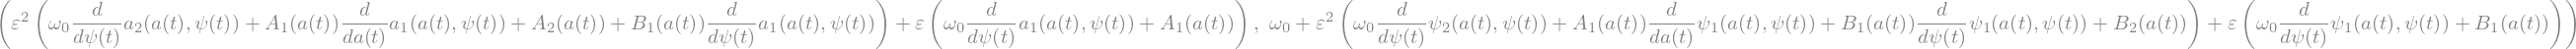

In [143]:
# Получаем разложение левых частей уравнений
Subs_derivative={Derivative(a(t),t):Subs_dota,Derivative(psi(t),t):Subs_dotpsi}
lhs_dotr=collect(series(Subs_r.diff(t).subs(Subs_derivative).expand(),\
                        eps,0,Nexpand).removeO(),eps)
lhs_dotphi=collect(series(Subs_phi.diff(t).subs(Subs_derivative).expand(),\
                        eps,0,Nexpand).removeO(),eps)
lhs_dotr,lhs_dotphi

In [144]:
# Получаем разложение правых частей уравнений
Subs_rphi={r:Subs_r,phi:Subs_phi}
rhs_dotr=collect(series(EqVdP_r.subs(Subs_rphi),eps,0,Nexpand).removeO(),eps)
rhs_dotphi=collect(series(EqVdP_phi.subs(Subs_rphi),eps,0,Nexpand).removeO(),eps)
rhs_dotr,rhs_dotphi

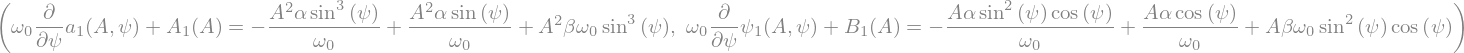

In [123]:
Eq(lhs_dotr.coeff(eps,1),rhs_dotr.coeff(eps,1)).subs(Subs_apsi),\
Eq(lhs_dotphi.coeff(eps,1),rhs_dotphi.coeff(eps,1)).subs(Subs_apsi)

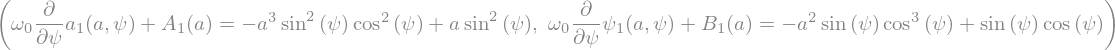

In [145]:
# Уравнения первого порядка
Subs_apsi={a(t):A,psi(t):Psi}
FO_r=Eq(lhs_dotr.coeff(eps,1),rhs_dotr.coeff(eps,1)).subs(Subs_apsi)
FO_phi=Eq(lhs_dotphi.coeff(eps,1),rhs_dotphi.coeff(eps,1)).subs(Subs_apsi)
FO_r,FO_phi

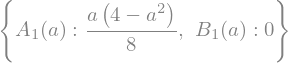

In [149]:
# Выполняем усреднение и находим A_1,B_1
SubsAB1=dict(zip([Alst[0](A),Blst[0](A)],\
                 [Average(FO_r.rhs,Psi),\
                  Average(FO_phi.rhs,Psi)]))
SubsAB1

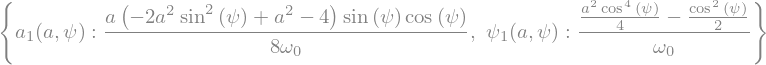

In [151]:
# Находим поправки первого порядка
Subsapsi1=dict(zip([alst[0](A,Psi),psilst[0](A,Psi)],\
                   [integrate((FO_r.rhs-SubsAB1[Alst[0](A)])/omega0,Psi).trigsimp(),\
                    integrate(FO_phi.rhs/omega0,Psi).trigsimp()]))
Subsapsi1

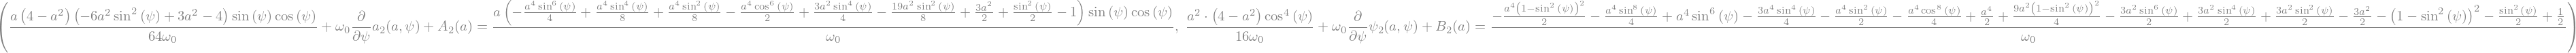

In [163]:
Eq(lhs_dotr.coeff(eps,2).subs(Subs_apsi).subs(SubsAB1).subs(Subsapsi1).doit().trigsimp(),\
   rhs_dotr.coeff(eps,2).subs(Subs_apsi).subs(Subsapsi1).doit().trigsimp()),\
Eq(lhs_dotphi.coeff(eps,2).subs(Subs_apsi).subs(SubsAB1).subs(Subsapsi1).doit().trigsimp(),\
   rhs_dotphi.coeff(eps,2).subs(Subs_apsi).subs(Subsapsi1).doit().trigsimp())

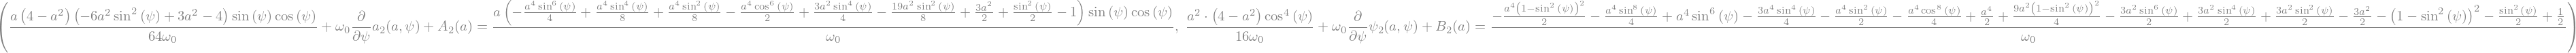

In [164]:
# Уравнения второго порядка
#Subs_apsi={a(t):A,psi(t):Psi}
SO_r=Eq(lhs_dotr.coeff(eps,2).subs(Subs_apsi).subs(SubsAB1).subs(Subsapsi1).doit().trigsimp(),\
        rhs_dotr.coeff(eps,2).subs(Subs_apsi).subs(Subsapsi1).trigsimp())
SO_phi=Eq(lhs_dotphi.coeff(eps,2).subs(Subs_apsi).subs(SubsAB1).subs(Subsapsi1).doit().trigsimp(),\
          rhs_dotphi.coeff(eps,2).subs(Subs_apsi).subs(Subsapsi1).trigsimp())
SO_r,SO_phi

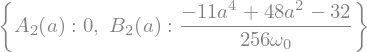

In [165]:
SubsAB2=dict(zip([Alst[1](A),Blst[1](A)],\
                 [Average(SO_r.rhs,Psi),\
                  Average(SO_phi.rhs,Psi)]))
SubsAB2

Таким образом, с точностью до третьего порядка по $\varepsilon$ найдена поправка
к частоте $\omega_0$.

# Задания

![Tasks](Lecture3_tasks.png)

**Задача 2.** (опционально)

Для уравнения Ван-дер-Поля досчитать пример и построить фазовый портрет предельного цикла с точностью до 2-го порядка

# Рекомендуемая литература

1. *Найфэ А.* Введение в методы возмущений. М., Мир., 1984.
2. *Журавлев В.Ф., Петров А.Г., Шундерюк М.М.* Избранные задачи гамильтоновой механики. М.: ЛЕНАНД, 2015.
3. *Гукенхеймер Д., Холмс Ф.* Нелинейные колебания, динамические системы и бифуркации векторных полей. Москва-Ижевск : Институт компьютерных исследований, 2002.